# Name: Darpan Relan

# predict price for automobile industry

In [1]:
# importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading data
data=pd.read_csv('AutoData (1).csv')
data.head()

symboling                      make fueltype aspiration doornumber  \
0          3        alfa-romero giulia      gas        std        two   
1          3       alfa-romero stelvio      gas        std        two   
2          1  alfa-romero Quadrifoglio      gas        std        two   
3          2               audi 100 ls      gas        std       four   
4          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0  convertible        rwd          front       88.6      168.8  ...   
1  convertible        rwd          front       88.6      168.8  ...   
2    hatchback        rwd          front       94.5      171.2  ...   
3        sedan        fwd          front       99.8      176.6  ...   
4        sedan        4wd          front       99.4      176.6  ...   

   enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
0         130        mpfi       3.47   2.68              9.0         111   
1         130        mpfi       3.47   2.68              9.0         111   
2         152        mpfi       2.68   3.47              9.0         154   
3         109        mpfi       3.19   3.40             10.0         102   
4         136        mpfi       3.19   3.40              8.0         115   

  peakrpm  citympg  highwaympg    price  
0    5000       21          27  13495.0  
1    5000       21          27  16500.0  
2    5000       19          26  16500.0  
3    5500       24          30  13950.0  
4    5500       18          22  17450.0  

[5 rows x 25 columns]

In [3]:
data.describe()

symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [4]:
# there is no null values
data.isna()

symboling   make  fueltype  aspiration  doornumber  carbody  drivewheel  \
0        False  False     False       False       False    False       False   
1        False  False     False       False       False    False       False   
2        False  False     False       False       False    False       False   
3        False  False     False       False       False    False       False   
4        False  False     False       False       False    False       False   
..         ...    ...       ...         ...         ...      ...         ...   
200      False  False     False       False       False    False       False   
201      False  False     False       False       False    False       False   
202      False  False     False       False       False    False       False   
203      False  False     False       False       False    False       False   
204      False  False     False       False       False    False       False   

     enginelocation  wheelbase  carlength  ...  enginesize  fuelsystem  \
0             False      False      False  ...       False       False   
1             False      False      False  ...       False       False   
2             False      False      False  ...       False       False   
3             False      False      False  ...       False       False   
4             False      False      False  ...       False       False   
..              ...        ...        ...  ...         ...         ...   
200           False      False      False  ...       False       False   
201           False      False      False  ...       False       False   
202           False      False      False  ...       False       False   
203           False      False      False  ...       False       False   
204           False      False      False  ...       False       False   

     boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0        False   False             False       False    False    False   
1        False   False             False       False    False    False   
2        False   False             False       False    False    False   
3        False   False             False       False    False    False   
4        False   False             False       False    False    False   
..         ...     ...               ...         ...      ...      ...   
200      False   False             False       False    False    False   
201      False   False             False       False    False    False   
202      False   False             False       False    False    False   
203      False   False             False       False    False    False   
204      False   False             False       False    False    False   

     highwaympg  price  
0         False  False  
1         False  False  
2         False  False  
3         False  False  
4         False  False  
..          ...    ...  
200       False  False  
201       False  False  
202       False  False  
203       False  False  
204       False  False  

[205 rows x 25 columns]

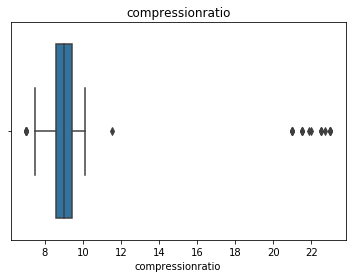

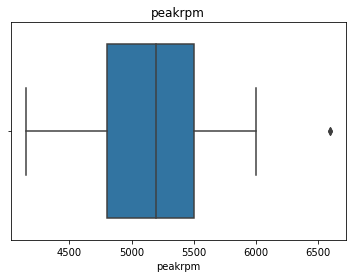

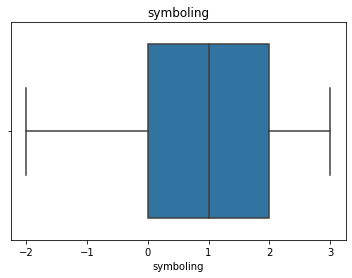

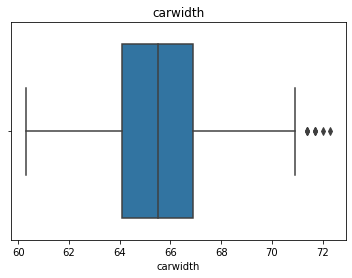

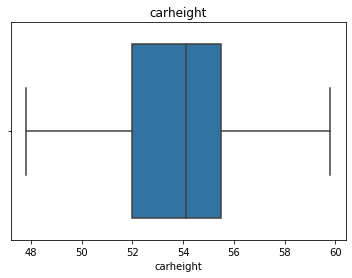

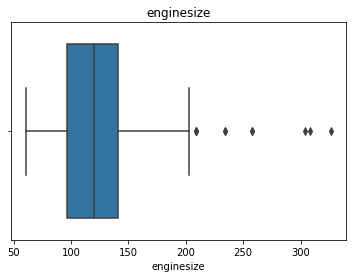

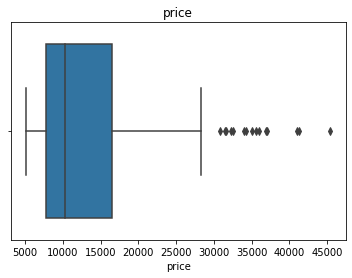

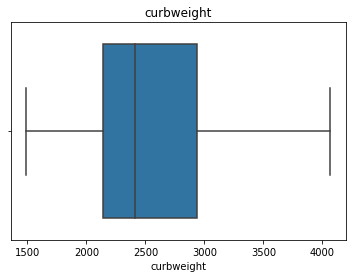

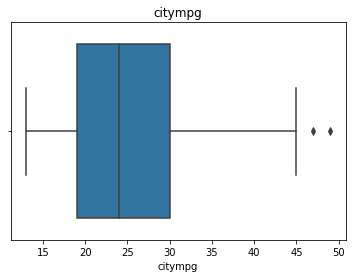

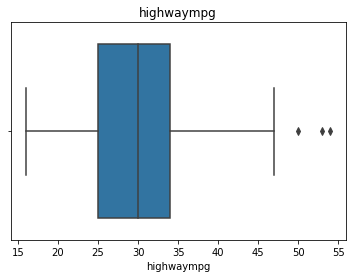

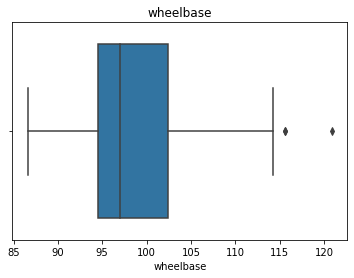

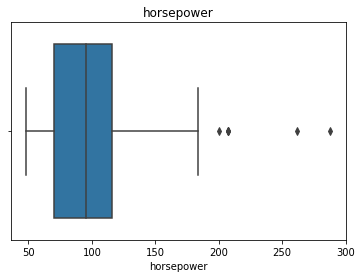

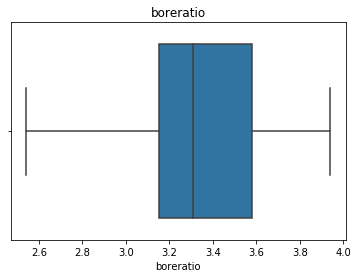

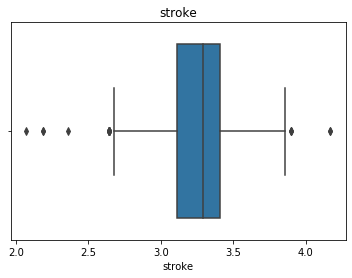

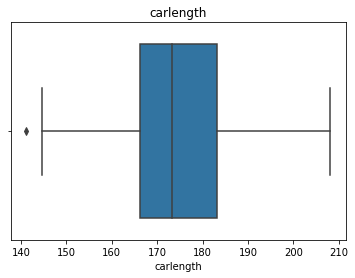

In [5]:
tempdata = data[{"symboling", "wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"}]
for i in tempdata.columns:
    plt.title(i)
    sns.boxplot(tempdata[i])
    plt.show()

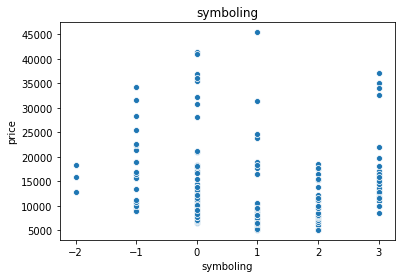

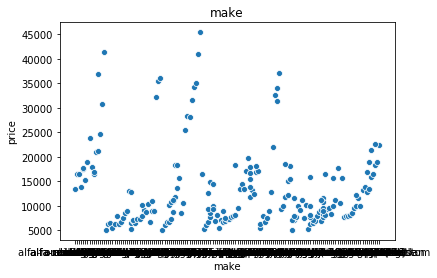

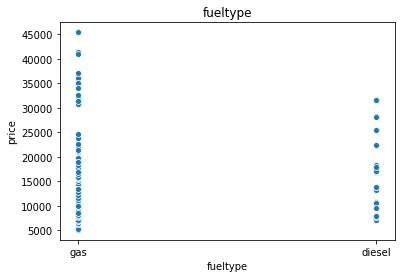

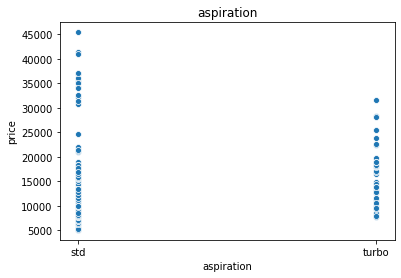

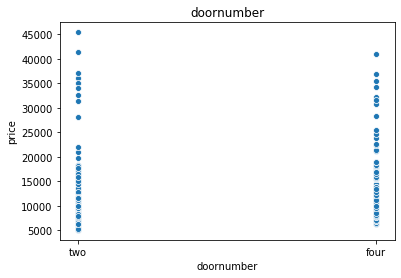

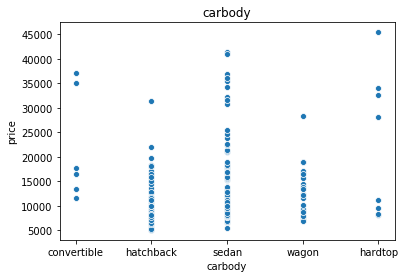

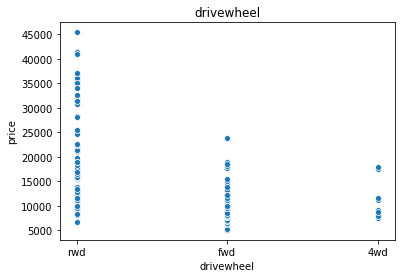

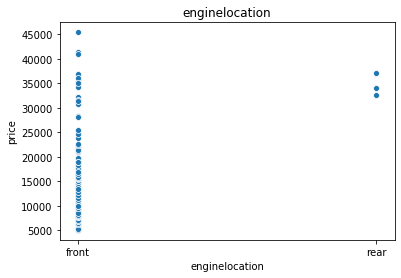

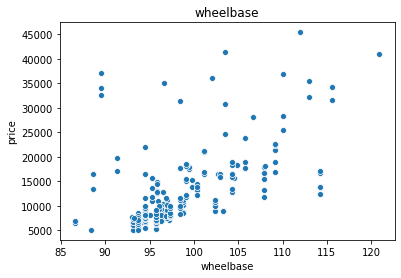

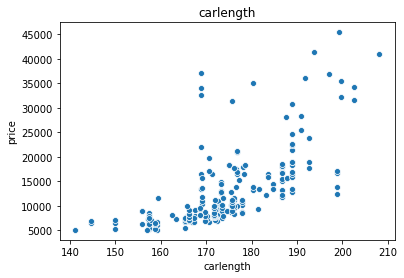

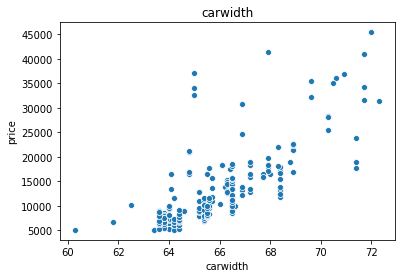

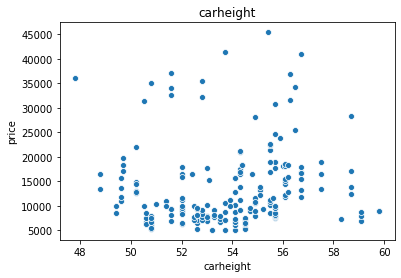

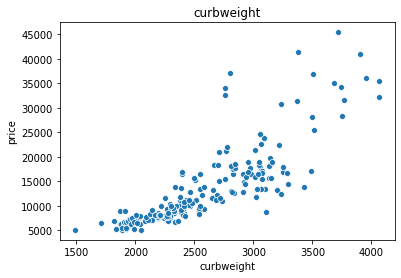

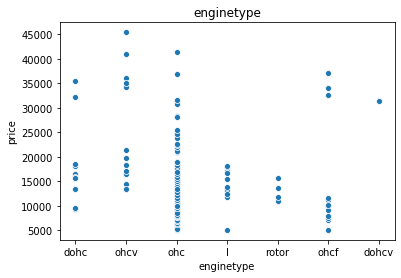

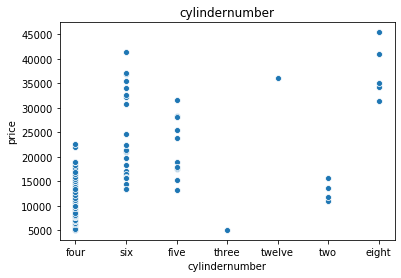

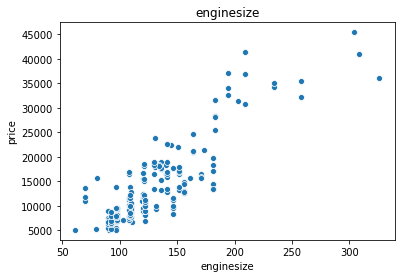

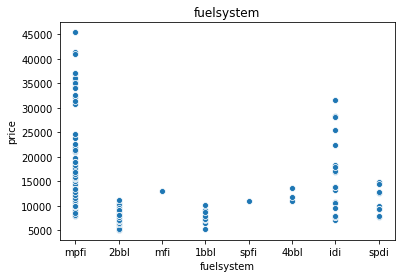

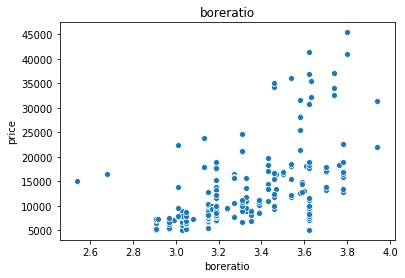

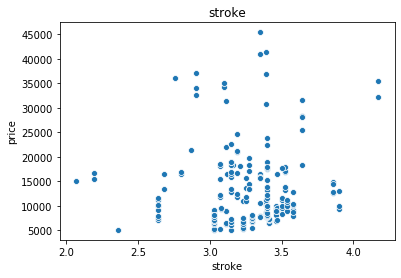

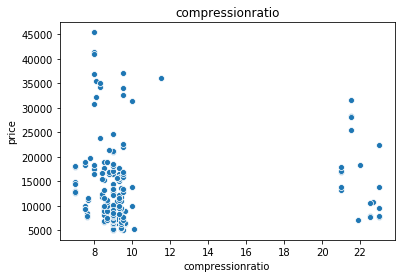

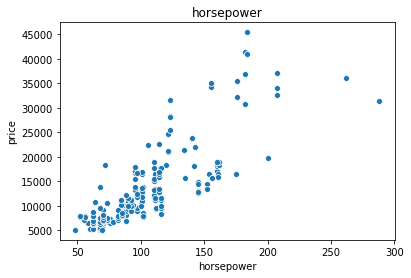

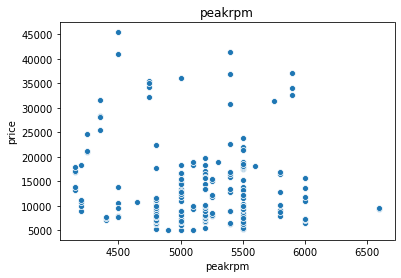

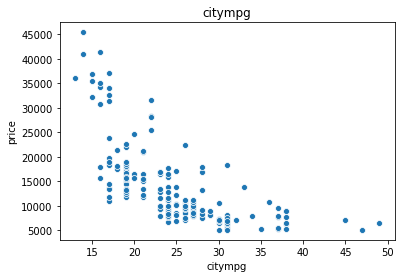

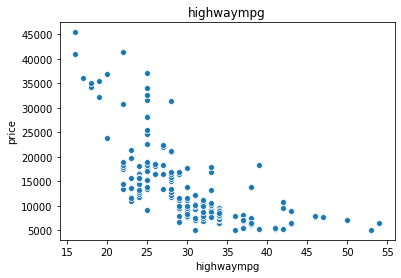

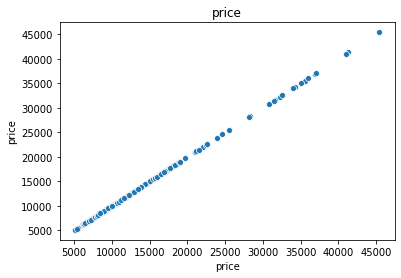

In [6]:
for i in data.columns:
    plt.title(i)
    sns.scatterplot(data[i],data['price'])
    plt.show()

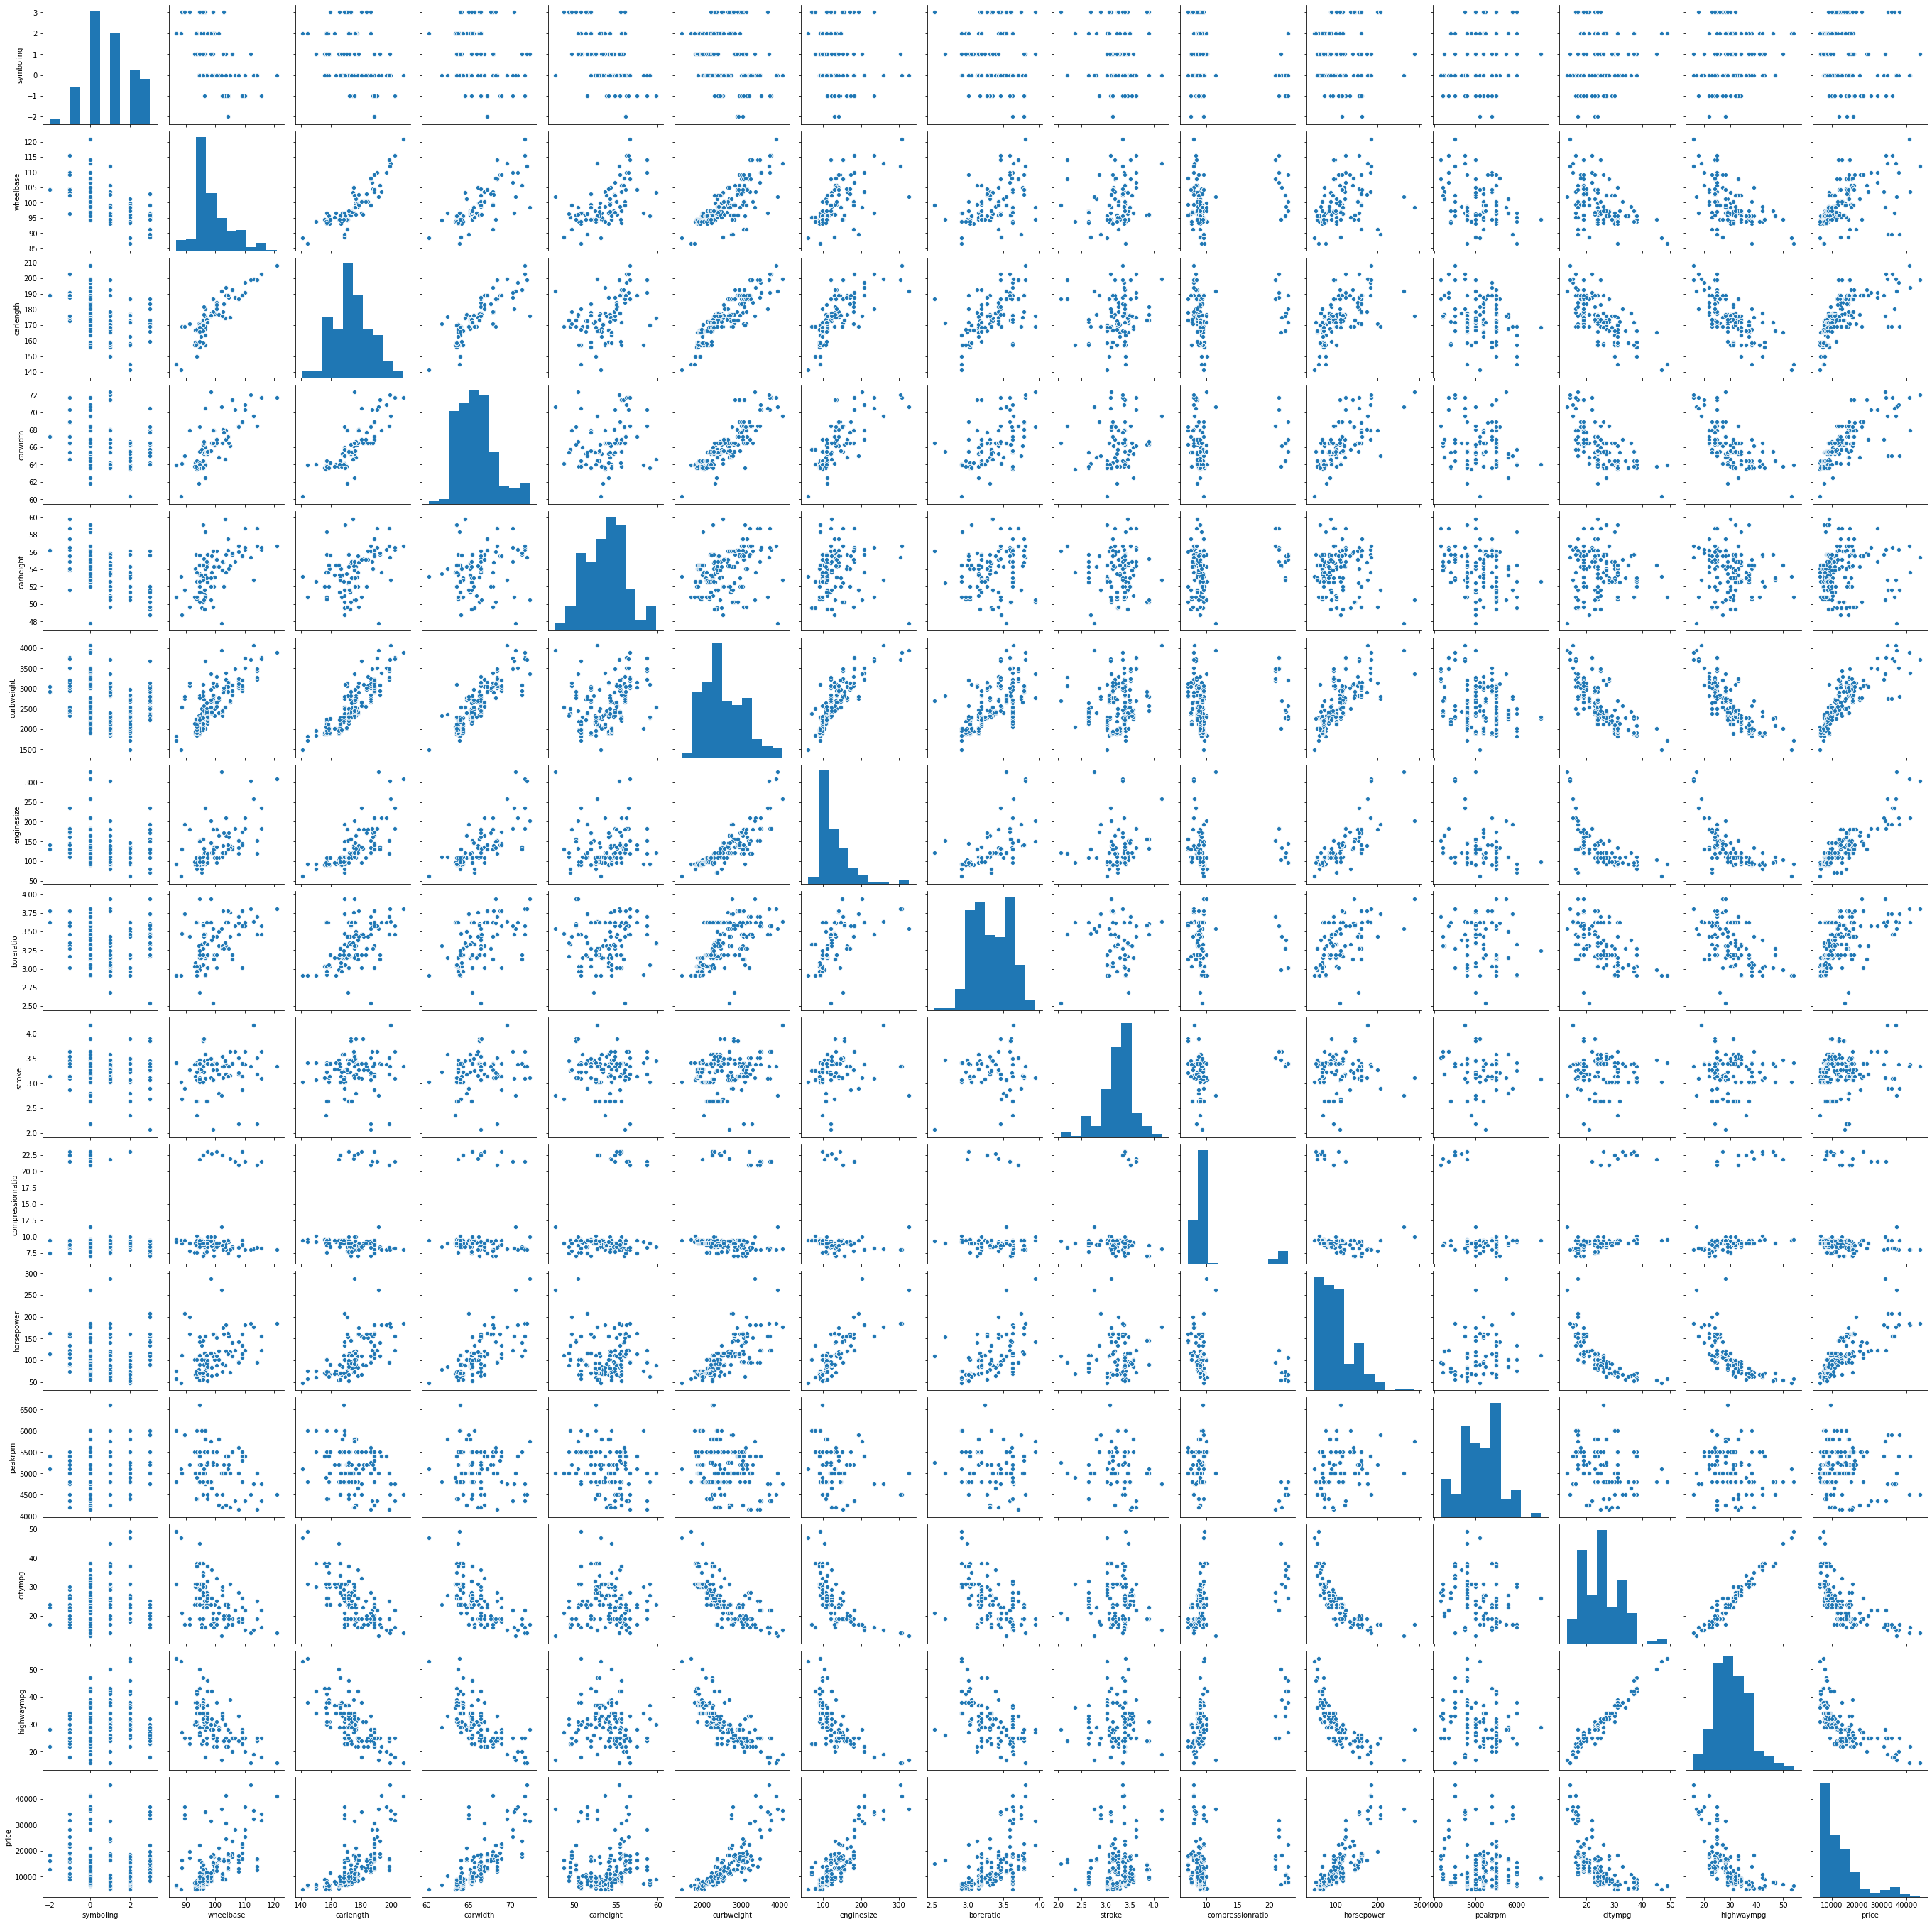

In [7]:
sns.pairplot(data)

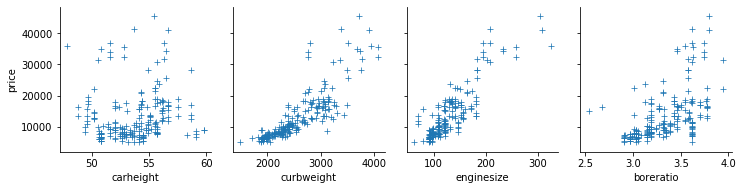

In [8]:
sns.pairplot(data, x_vars=['carheight', 'curbweight', 'enginesize', 'boreratio'],y_vars='price', markers="+")
plt.show()

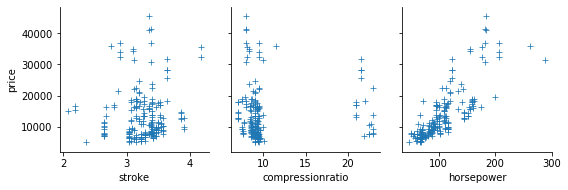

In [9]:
sns.pairplot(data, x_vars=[ 'stroke', 'compressionratio', 'horsepower'],y_vars='price', markers="+")
plt.show()

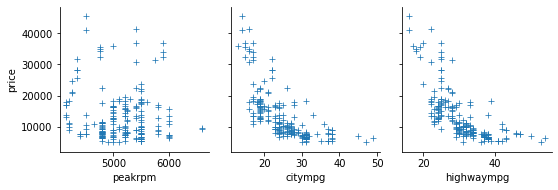

In [10]:
sns.pairplot(data, x_vars=['peakrpm', 'citympg', 'highwaympg'],y_vars='price', markers="+")
plt.show()

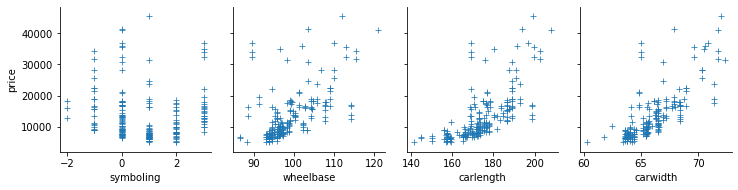

In [11]:
sns.pairplot(data, x_vars=['symboling', 'wheelbase', 'carlength', 'carwidth'],y_vars='price', markers="+")
plt.show()

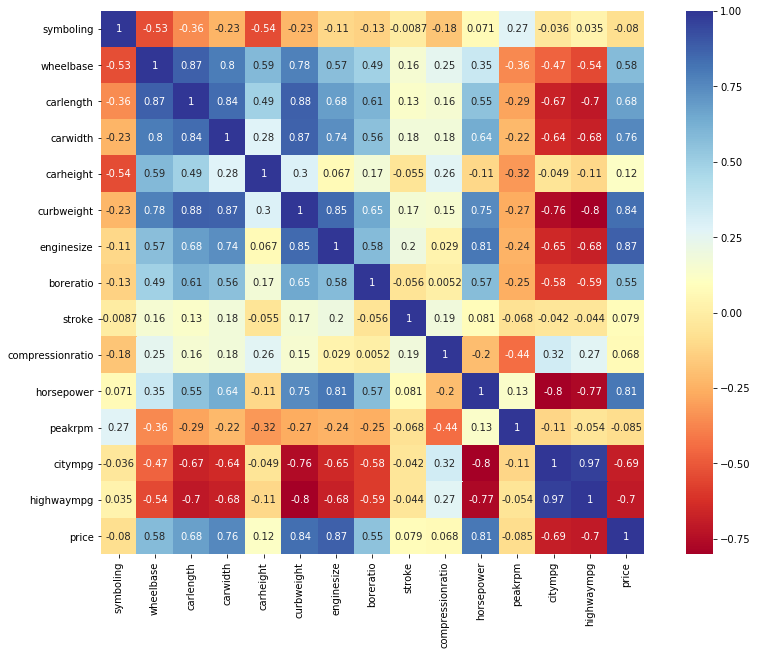

In [12]:
plt.subplots(figsize=(15,10))
sns_plot = sns.heatmap(data.corr(),annot =True,cmap='RdYlBu',square=True)
fig = sns_plot.get_figure()

In [13]:
# label encoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['symboling']=lb.fit_transform(data['symboling'])
data['make']=lb.fit_transform(data['make'])
data['fueltype']=lb.fit_transform(data['fueltype'])
data['aspiration']=lb.fit_transform(data['aspiration'])
data['doornumber']=lb.fit_transform(data['doornumber'])
data['carbody']=lb.fit_transform(data['carbody'])
data['drivewheel']=lb.fit_transform(data['drivewheel'])
data['enginelocation']=lb.fit_transform(data['enginelocation'])
data['fuelsystem']=lb.fit_transform(data['fuelsystem'])
data['cylindernumber']=lb.fit_transform(data['cylindernumber'])
data['enginetype']=lb.fit_transform(data['enginetype'])
data

symboling  make  fueltype  aspiration  doornumber  carbody  drivewheel  \
0            5     2         1           0           1        0           2   
1            5     3         1           0           1        0           2   
2            3     1         1           0           1        2           2   
3            4     4         1           0           0        3           1   
4            4     5         1           0           0        3           0   
..         ...   ...       ...         ...         ...      ...         ...   
200          1   139         1           0           0        3           2   
201          1   138         1           1           0        3           2   
202          1   140         1           0           0        3           2   
203          1   142         0           1           0        3           2   
204          1   143         1           1           0        3           2   

     enginelocation  wheelbase  carlength  ...  enginesize  fuelsystem  \
0                 0       88.6      168.8  ...         130           5   
1                 0       88.6      168.8  ...         130           5   
2                 0       94.5      171.2  ...         152           5   
3                 0       99.8      176.6  ...         109           5   
4                 0       99.4      176.6  ...         136           5   
..              ...        ...        ...  ...         ...         ...   
200               0      109.1      188.8  ...         141           5   
201               0      109.1      188.8  ...         141           5   
202               0      109.1      188.8  ...         173           5   
203               0      109.1      188.8  ...         145           3   
204               0      109.1      188.8  ...         141           5   

     boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0         3.47    2.68               9.0         111     5000       21   
1         3.47    2.68               9.0         111     5000       21   
2         2.68    3.47               9.0         154     5000       19   
3         3.19    3.40              10.0         102     5500       24   
4         3.19    3.40               8.0         115     5500       18   
..         ...     ...               ...         ...      ...      ...   
200       3.78    3.15               9.5         114     5400       23   
201       3.78    3.15               8.7         160     5300       19   
202       3.58    2.87               8.8         134     5500       18   
203       3.01    3.40              23.0         106     4800       26   
204       3.78    3.15               9.5         114     5400       19   

     highwaympg    price  
0            27  13495.0  
1            27  16500.0  
2            26  16500.0  
3            30  13950.0  
4            22  17450.0  
..          ...      ...  
200          28  16845.0  
201          25  19045.0  
202          23  21485.0  
203          27  22470.0  
204          25  22625.0  

[205 rows x 25 columns]

In [14]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]
x

symboling  make  fueltype  aspiration  doornumber  carbody  drivewheel  \
0            5     2         1           0           1        0           2   
1            5     3         1           0           1        0           2   
2            3     1         1           0           1        2           2   
3            4     4         1           0           0        3           1   
4            4     5         1           0           0        3           0   
..         ...   ...       ...         ...         ...      ...         ...   
200          1   139         1           0           0        3           2   
201          1   138         1           1           0        3           2   
202          1   140         1           0           0        3           2   
203          1   142         0           1           0        3           2   
204          1   143         1           1           0        3           2   

     enginelocation  wheelbase  carlength  ...  cylindernumber  enginesize  \
0                 0       88.6      168.8  ...               2         130   
1                 0       88.6      168.8  ...               2         130   
2                 0       94.5      171.2  ...               3         152   
3                 0       99.8      176.6  ...               2         109   
4                 0       99.4      176.6  ...               1         136   
..              ...        ...        ...  ...             ...         ...   
200               0      109.1      188.8  ...               2         141   
201               0      109.1      188.8  ...               2         141   
202               0      109.1      188.8  ...               3         173   
203               0      109.1      188.8  ...               3         145   
204               0      109.1      188.8  ...               2         141   

     fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0             5       3.47    2.68               9.0         111     5000   
1             5       3.47    2.68               9.0         111     5000   
2             5       2.68    3.47               9.0         154     5000   
3             5       3.19    3.40              10.0         102     5500   
4             5       3.19    3.40               8.0         115     5500   
..          ...        ...     ...               ...         ...      ...   
200           5       3.78    3.15               9.5         114     5400   
201           5       3.78    3.15               8.7         160     5300   
202           5       3.58    2.87               8.8         134     5500   
203           3       3.01    3.40              23.0         106     4800   
204           5       3.78    3.15               9.5         114     5400   

     citympg  highwaympg  
0         21          27  
1         21          27  
2         19          26  
3         24          30  
4         18          22  
..       ...         ...  
200       23          28  
201       19          25  
202       18          23  
203       26          27  
204       19          25  

[205 rows x 24 columns]

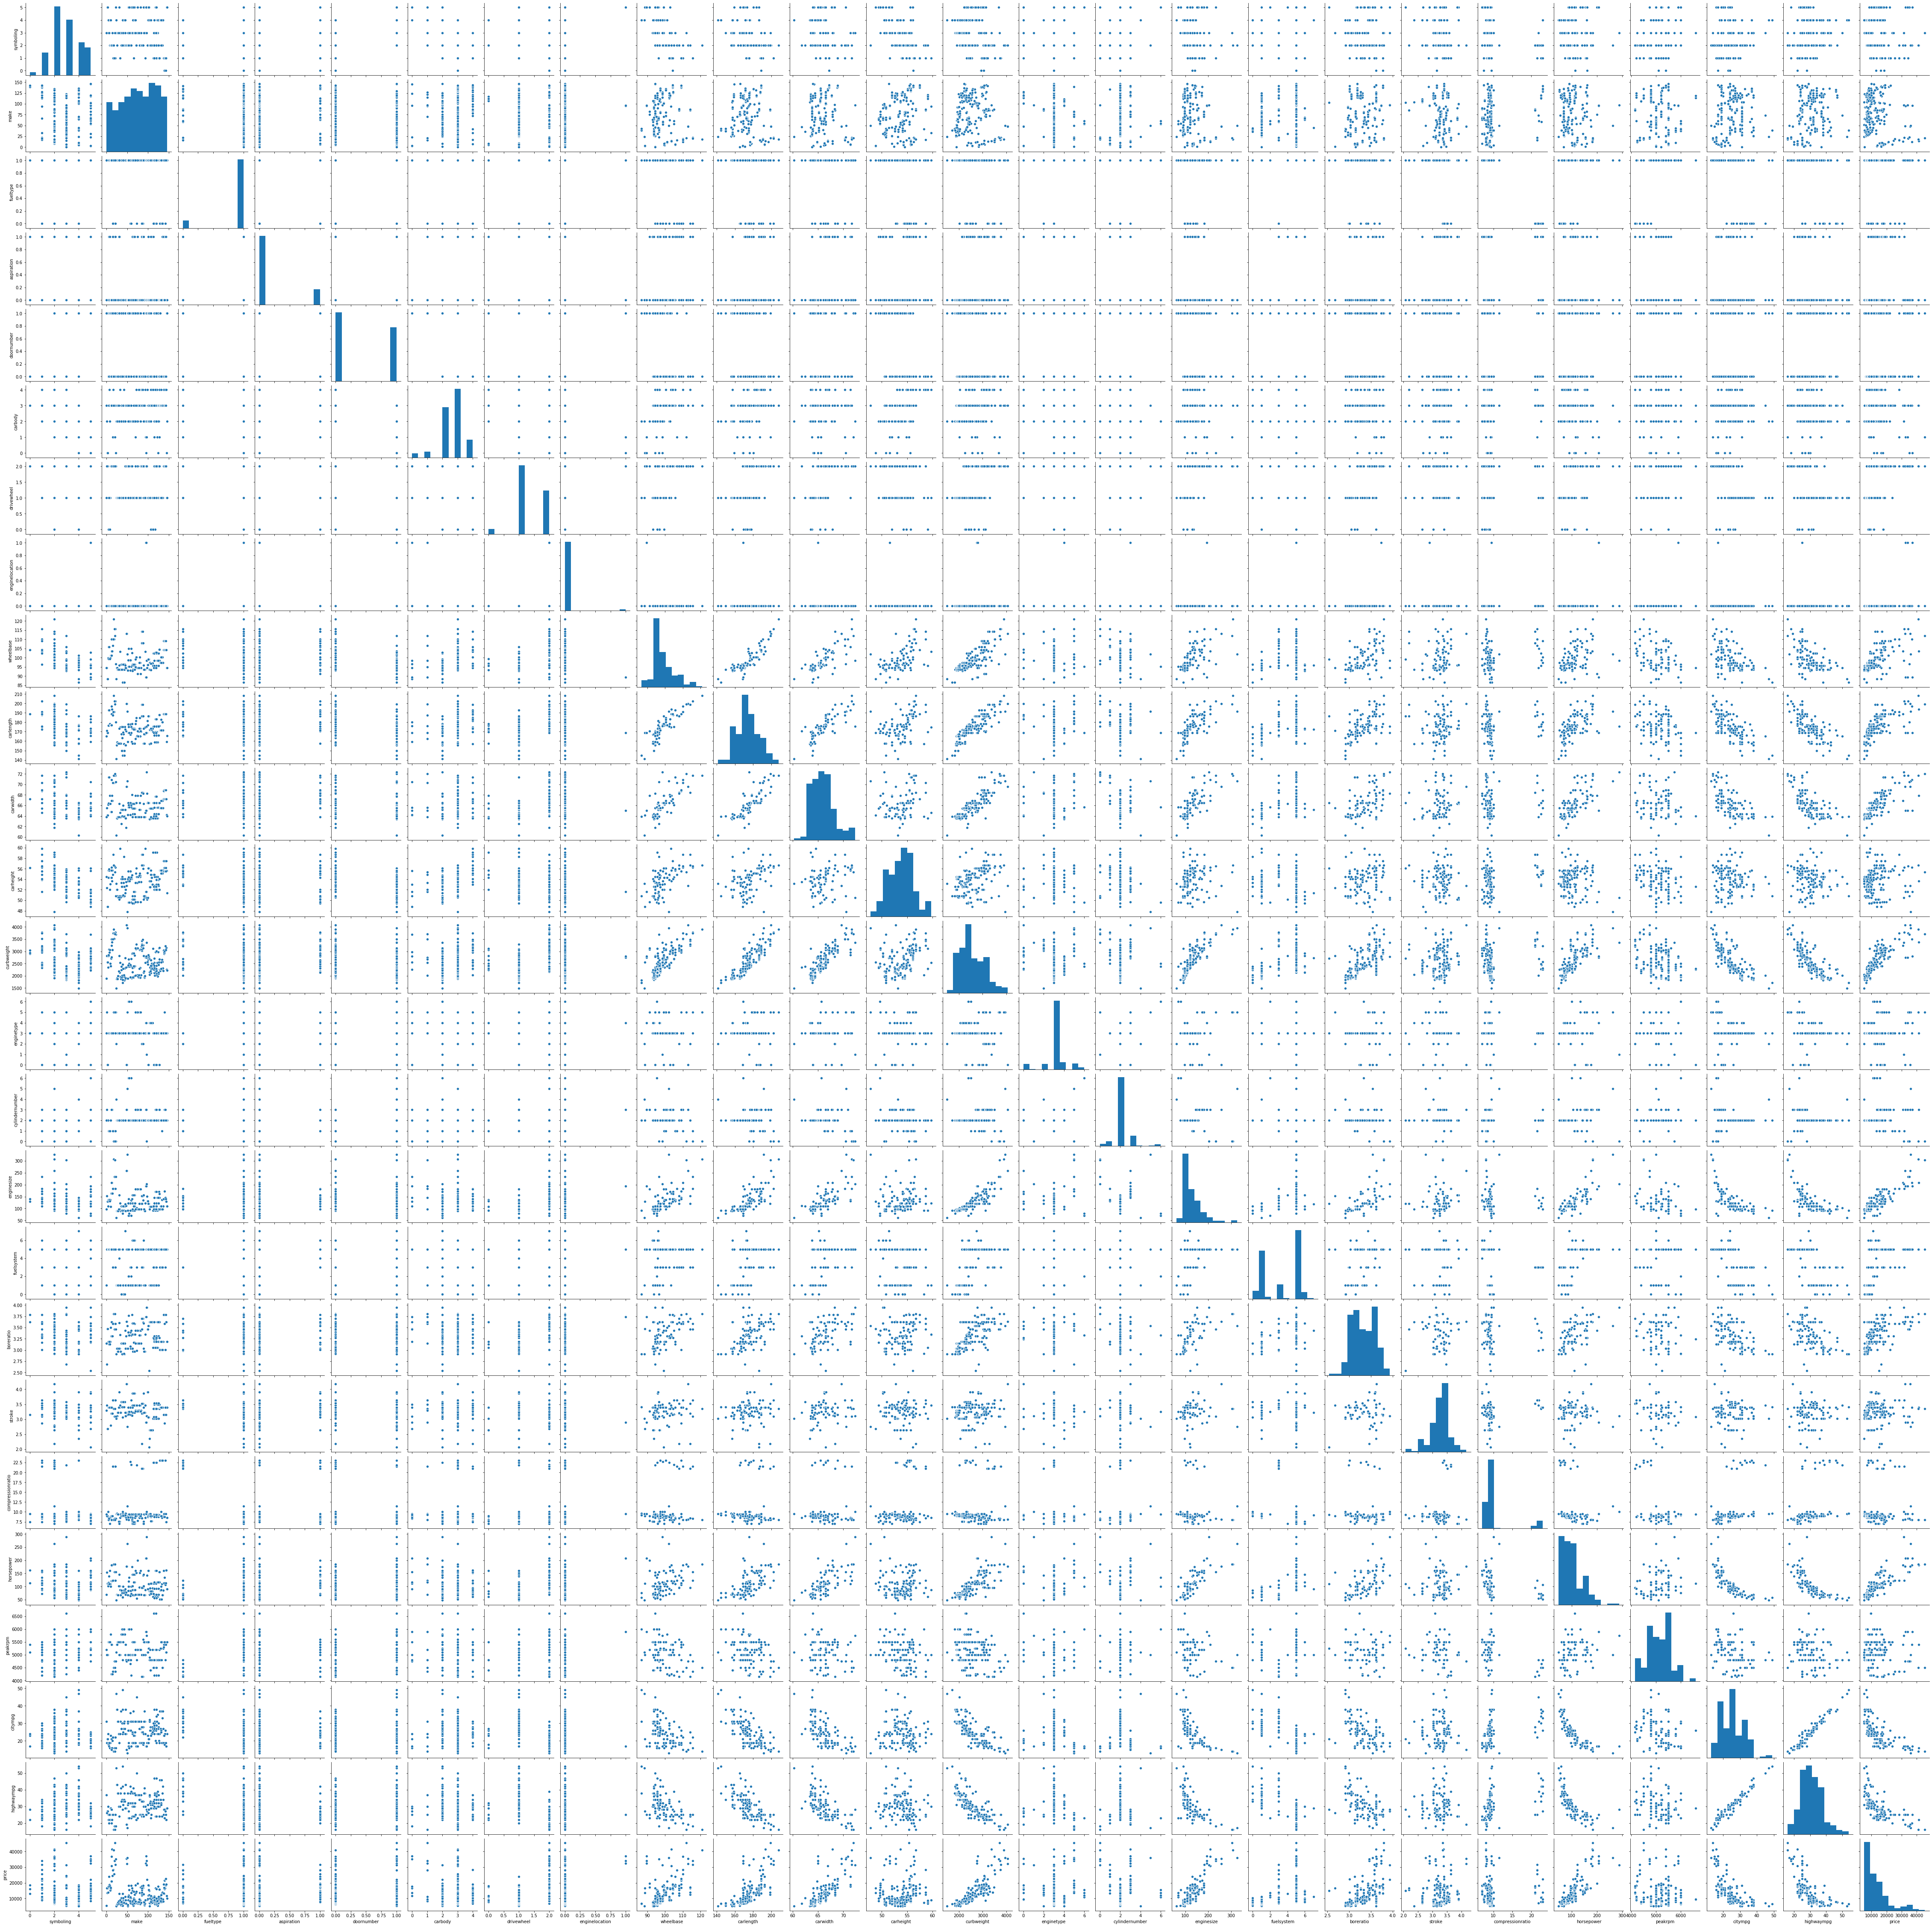

In [15]:
sns.pairplot(data)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
rf=RandomForestRegressor(n_estimators=4)
rf_reg=rf.fit(x,y)
rf_reg

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=4, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# train test split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [18]:
y_pred=rf_reg.predict(x_test)
pd.DataFrame(y_pred)
#pd.DataFrame(y)

0
0    8449.000
1    5423.000
2    7700.375
3   15157.500
4    6666.500
..        ...
57   6241.000
58  12038.750
59  10557.500
60   7653.000
61   6938.000

[62 rows x 1 columns]

In [19]:
df=pd.concat([y_train,pd.DataFrame(y_train)],axis=1)
df

price    price
190   9980.0   9980.0
121   6692.0   6692.0
17   36880.0  36880.0
12   20970.0  20970.0
118   5572.0   5572.0
..       ...      ...
165   9298.0   9298.0
24    6229.0   6229.0
71   34184.0  34184.0
152   6488.0   6488.0
133  12170.0  12170.0

[143 rows x 2 columns]

# for finding te best variable to do linear regression

In [20]:
names=data.index
print('featured sorted by their score:')
print(sorted(zip(map(lambda x:round(x,4),rf_reg.feature_importances_),names),reverse=True))

featured sorted by their score:
[(0.6644, 15), (0.1312, 23), (0.1163, 12), (0.0159, 9), (0.0155, 1), (0.0117, 20), (0.0099, 10), (0.0091, 18), (0.0054, 19), (0.0053, 21), (0.0048, 8), (0.0035, 22), (0.0021, 11), (0.001, 5), (0.0008, 3), (0.0008, 0), (0.0006, 6), (0.0005, 17), (0.0004, 16), (0.0004, 13), (0.0002, 14), (0.0001, 4), (0.0, 7), (0.0, 2)]


# a simple linear regression using cylinder number

In [21]:
x=data[['enginesize','curbweight','make','highwaympg','citympg','horsepower','compressionratio','carwidth','peakrpm','stroke','carheight','wheelbase']]
y=data.iloc[:,-1:]
x

enginesize  curbweight  make  highwaympg  citympg  horsepower  \
0           130        2548     2          27       21         111   
1           130        2548     3          27       21         111   
2           152        2823     1          26       19         154   
3           109        2337     4          30       24         102   
4           136        2824     5          22       18         115   
..          ...         ...   ...         ...      ...         ...   
200         141        2952   139          28       23         114   
201         141        3049   138          25       19         160   
202         173        3012   140          23       18         134   
203         145        3217   142          27       26         106   
204         141        3062   143          25       19         114   

     compressionratio  carwidth  peakrpm  stroke  carheight  wheelbase  
0                 9.0      64.1     5000    2.68       48.8       88.6  
1                 9.0      64.1     5000    2.68       48.8       88.6  
2                 9.0      65.5     5000    3.47       52.4       94.5  
3                10.0      66.2     5500    3.40       54.3       99.8  
4                 8.0      66.4     5500    3.40       54.3       99.4  
..                ...       ...      ...     ...        ...        ...  
200               9.5      68.9     5400    3.15       55.5      109.1  
201               8.7      68.8     5300    3.15       55.5      109.1  
202               8.8      68.9     5500    2.87       55.5      109.1  
203              23.0      68.9     4800    3.40       55.5      109.1  
204               9.5      68.9     5400    3.15       55.5      109.1  

[205 rows x 12 columns]

In [22]:
# importing libraries
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error

In [23]:
lin_model=linear_model.LinearRegression()
a=lin_model.fit(x,y)
a
a.intercept_
a.coef_

array([[ 1.00893586e+02,  1.37852777e+00, -2.97690355e+01,
         1.96577458e+02, -2.41590705e+02,  4.66195662e+01,
         3.06639703e+02,  3.47638669e+02,  1.93804656e+00,
        -3.34077970e+03,  1.97308327e+02,  5.75803755e+01]])

In [24]:
y_pred=a.predict(x)
print(y_pred)

[[15564.59534782]
 [15534.82631232]
 [19381.87607741]
 [13871.24558163]
 [17153.14149768]
 [16616.93403223]
 [19832.01514666]
 [19924.11513039]
 [20508.39673344]
 [19222.8783948 ]
 [15481.9186092 ]
 [15481.9186092 ]
 [18509.8736015 ]
 [18555.92359337]
 [19656.95559753]
 [28972.32928889]
 [29102.3614334 ]
 [31112.84136206]
 [ 1092.86783798]
 [ 7361.79020562]
 [ 7380.26964208]
 [ 6343.39655214]
 [ 7438.29429333]
 [ 9061.09110652]
 [ 7315.89540649]
 [ 7495.06819495]
 [ 7524.83723045]
 [ 9168.01476163]
 [13040.91036765]
 [15937.93647514]
 [ 3117.86219373]
 [ 7390.45553969]
 [ 5813.54747377]
 [ 7989.89200812]
 [ 7833.33423943]
 [ 8592.73078939]
 [ 9207.96181238]
 [10937.81761121]
 [10862.03440553]
 [10951.25187728]
 [10344.51964411]
 [11763.21834429]
 [10913.56975714]
 [ 8224.70871189]
 [ 6766.40949559]
 [ 6784.88893205]
 [11665.8735204 ]
 [30447.58923884]
 [30477.35827435]
 [46183.28293539]
 [ 5611.01781662]
 [ 6789.02362927]
 [ 6498.22591311]
 [ 6612.90509492]
 [ 6649.56676928]
 [ 8714.63

In [25]:
# mean squared error 
import sklearn.metrics
mse=sklearn.metrics.mean_squared_error(y,y_pred)
mse

8425165.69085036

In [26]:
# root mean squared error 
import math
rmse=math.sqrt(mse)
rmse

2902.6135965454237

In [27]:
df=pd.concat([y,pd.DataFrame(y_pred)],axis=1)
df

price             0
0    13495.0  15564.595348
1    16500.0  15534.826312
2    16500.0  19381.876077
3    13950.0  13871.245582
4    17450.0  17153.141498
..       ...           ...
200  16845.0  16535.648013
201  19045.0  18746.384448
202  21485.0  21889.218136
203  22470.0  18062.532137
204  22625.0  16944.840370

[205 rows x 2 columns]

# random forest regressor

## random forest using feature importance

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=20)
rf_reg=rf.fit(x,y)
rf_reg

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [29]:
y_pred1=rf_reg.predict(x)
pd.DataFrame(y_pred1)
df=pd.concat([y,pd.DataFrame(y_pred1)],axis=1)
df

price          0
0    13495.0  14473.375
1    16500.0  15525.125
2    16500.0  17093.400
3    13950.0  14215.500
4    17450.0  16955.500
..       ...        ...
200  16845.0  17570.250
201  19045.0  19994.500
202  21485.0  19537.200
203  22470.0  20909.750
204  22625.0  21474.150

[205 rows x 2 columns]

# random forest regression using all variables

In [30]:
x=data.iloc[:,:-1]
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=20)
rf_reg=rf.fit(x,y)
rf_reg

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [31]:
y_pred1=rf_reg.predict(x)
pd.DataFrame(y_pred1)
df=pd.concat([y,pd.DataFrame(y_pred1)],axis=1)
df

price            0
0    13495.0  14526.75000
1    16500.0  15728.75000
2    16500.0  16578.10000
3    13950.0  12781.20000
4    17450.0  17060.47505
..       ...          ...
200  16845.0  17755.25000
201  19045.0  18579.65000
202  21485.0  20431.95000
203  22470.0  20884.70000
204  22625.0  22049.75000

[205 rows x 2 columns]

# decision tree regression 

## using all variables

In [32]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor()
dt_reg.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [33]:
y_pred2=dt_reg.predict(x)
pd.DataFrame(y_pred2)
df=pd.concat([y,pd.DataFrame(y_pred2)],axis=1)
df

price        0
0    13495.0  13495.0
1    16500.0  16500.0
2    16500.0  16500.0
3    13950.0  13950.0
4    17450.0  17450.0
..       ...      ...
200  16845.0  16845.0
201  19045.0  19045.0
202  21485.0  21485.0
203  22470.0  22470.0
204  22625.0  22625.0

[205 rows x 2 columns]

# decision tree regression

## decision tree using feature importance

In [34]:
x=data[['enginesize','curbweight','make','highwaympg','citympg','horsepower','compressionratio','carwidth','peakrpm','stroke','carheight','wheelbase']]
y=data.iloc[:,-1:]
x

enginesize  curbweight  make  highwaympg  citympg  horsepower  \
0           130        2548     2          27       21         111   
1           130        2548     3          27       21         111   
2           152        2823     1          26       19         154   
3           109        2337     4          30       24         102   
4           136        2824     5          22       18         115   
..          ...         ...   ...         ...      ...         ...   
200         141        2952   139          28       23         114   
201         141        3049   138          25       19         160   
202         173        3012   140          23       18         134   
203         145        3217   142          27       26         106   
204         141        3062   143          25       19         114   

     compressionratio  carwidth  peakrpm  stroke  carheight  wheelbase  
0                 9.0      64.1     5000    2.68       48.8       88.6  
1                 9.0      64.1     5000    2.68       48.8       88.6  
2                 9.0      65.5     5000    3.47       52.4       94.5  
3                10.0      66.2     5500    3.40       54.3       99.8  
4                 8.0      66.4     5500    3.40       54.3       99.4  
..                ...       ...      ...     ...        ...        ...  
200               9.5      68.9     5400    3.15       55.5      109.1  
201               8.7      68.8     5300    3.15       55.5      109.1  
202               8.8      68.9     5500    2.87       55.5      109.1  
203              23.0      68.9     4800    3.40       55.5      109.1  
204               9.5      68.9     5400    3.15       55.5      109.1  

[205 rows x 12 columns]

In [35]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor()
dt_reg.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [36]:
y_pred3=dt_reg.predict(x)
pd.DataFrame(y_pred3)
df=pd.concat([y,pd.DataFrame(y_pred3)],axis=1)
df

price        0
0    13495.0  13495.0
1    16500.0  16500.0
2    16500.0  16500.0
3    13950.0  13950.0
4    17450.0  17450.0
..       ...      ...
200  16845.0  16845.0
201  19045.0  19045.0
202  21485.0  21485.0
203  22470.0  22470.0
204  22625.0  22625.0

[205 rows x 2 columns]

# linear regression on train test split

In [38]:
from sklearn.metrics import r2_score
X1 = data[['enginesize']]
Y1 = data['price']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, train_size = 0.7, random_state = 42)
lin_model.fit(X1_train,Y1_train)
Y1_train_pred = lin_model.predict(X1_train)
Y1_test_pred = lin_model.predict(X1_test) 
print(X1_train.shape, X1_test.shape)
print(lin_model.intercept_, lin_model.coef_)
print(r2_score(Y1_train, Y1_train_pred))
print(r2_score(Y1_test, Y1_test_pred))

(143, 1) (62, 1)
-7646.435077807868 [165.76866245]
0.7686929078033782
0.7534902447506853


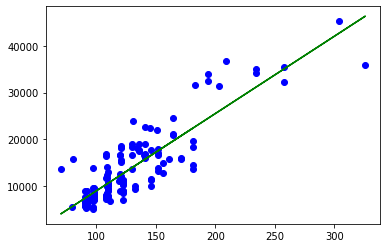

In [41]:
plt.scatter(X1_train, Y1_train, color ='b') 
plt.plot(X1_train, Y1_train_pred, color ='g') 
plt.show()

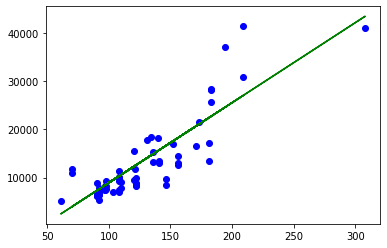

In [42]:
plt.scatter(X1_test, Y1_test, color ='b') 
plt.plot(X1_test, Y1_test_pred, color ='g') 
plt.show()

# Build model using best variable and report the R2

In [44]:
lin_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_train_pred = lin_model.predict(x_train)

In [46]:
r2_score(y_train, y_train_pred)

0.9144595378108903

In [48]:
from sklearn.feature_selection import RFE
rfe_selector = RFE(lin_model, 10)

In [49]:
rfe_selector.fit(x_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [51]:
cols_keep = x_train.columns[rfe_selector.support_]

In [53]:
r2_score(y_train, y_train_pred)

0.9144595378108903

In [54]:
pd.DataFrame(y_train_pred)

0
0     5661.194506
1     5609.785425
2    32848.041016
3    19277.039488
4     5094.402259
..            ...
138   9175.621734
139   8297.207927
140  35060.958549
141   5551.350961
142  12759.719253

[143 rows x 1 columns]

# by driving Feature importance we came to know that Engine size is the most to derive price and the most important factor to do